### Big Data Mart Sales Problem

Problem Statement: The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

bigdatamart_Train.csv: Use this file for the model building purpose.

bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

Note: You can find the dataset in the link below.

Downlaod Files: https://github.com/dsrscientist/bigdatamart_rep

### Importing Library

In [1]:
#data lib:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
#metrics
from sklearn.metrics import r2_score

from sklearn.metrics import mean_absolute_error,mean_squared_error
#save
import pickle

import warnings
warnings.filterwarnings('ignore')

# import dataset

In [84]:
train_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
test_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train_data.shape

(8523, 12)

In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Here we have seperate data for training & testing will train model on training data & later on we can predict test data.


### Missing Value & Non numeric Test

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Datset have 8523 line items & 12 features including target variable:Item_Outlet_Sales.
    
7 categorical columns found in data which need to treat.

2 features having missing value.

In [6]:
#categorical columns
cat_columns=[]
for col in train_data.dtypes.index:
    if train_data[col].dtypes=='object':
        cat_columns.append(col)
        
cat_columns        

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

### Duplicacy testing

In [7]:
#no duplicate entry found in dataset

train_data.duplicated().sum()

0

In [8]:

train_data.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

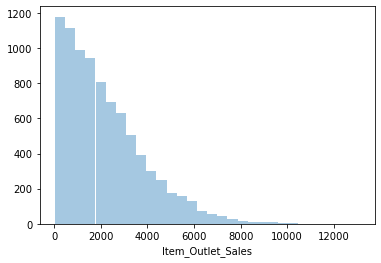

In [9]:
#testing target imbalancing
sns.distplot(train_data['Item_Outlet_Sales'],kde=False,bins=30)

plt.show()

targets are not imbalance.

### Treating Null

In [10]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
from sklearn.impute import KNNImputer

imp= KNNImputer()

train_data['Item_Weight']=imp.fit_transform(train_data[['Item_Weight']])

In [12]:
train_data['Item_Weight'].isna().sum()

0

In [13]:
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
train_data['Outlet_Size']=train_data['Outlet_Size'].map({'Small':1,'Medium':2,'High':3})

In [15]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

Outlet_size filling with value 2 which is mode

In [16]:
train_data['Outlet_Size'].fillna(value=2,axis=0,inplace=True)

In [17]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All Null values treated!

### Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
#categorical columns
cat_columns=[]
for col in train_data.dtypes.index:
    if train_data[col].dtypes=='object':
        cat_columns.append(col)
        
cat_columns   

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Type']

In [20]:
#column Identifier is nominal so removing it.
train_data.drop(columns=['Item_Identifier'],inplace=True)

In [21]:
#treating column Item_Fat_Content'
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Column Item_Fat_Content having same value with diffent name so need to rrect it

In [22]:
train_data['Item_Fat_Content'].replace({'Low Fat':'low fat','LF':'low fat','reg':'Regular'},inplace=True)

In [23]:
train_data['Item_Fat_Content'].unique()

array(['low fat', 'Regular'], dtype=object)

In [24]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].map({'low fat':0,'Regular':1})

In [25]:
#treating column Item_Type
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Its nominal data so will apply label encoder

In [26]:
#treating column Outlet_Identifier
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Its nominal data so will apply label encoder

In [27]:
#treating column Outlet_Location_Type

train_data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [28]:
#Ordinal data so encoding it here only

train_data['Outlet_Location_Type']=train_data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 3':3, 'Tier 2':2})

In [29]:
train_data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [30]:
#Ordinal data so encoding it here only

train_data['Outlet_Type']=train_data['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':4,
       'Supermarket Type3':3})

In [31]:
#appling nominal encoder on 2 features.

enc=LabelEncoder()

train_data['Outlet_Identifier']=enc.fit_transform(train_data['Outlet_Identifier'])
train_data['Item_Type']=enc.fit_transform(train_data['Item_Type'])

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   int32  
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   float64
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int32(2), int64(4)
memory usage: 666.0 KB


### All colums have treated now no null value & all data is numeric type

In [33]:
train_data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.829168,2.112871,1.709492,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,1.089985,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,1.000000,1.000000,1.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,1.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,2.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,3.000000,2.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,3.000000,4.000000,13086.964800


Few columns minimum values is 0 which could be a outlier. will check it with further processing 

## Correlation

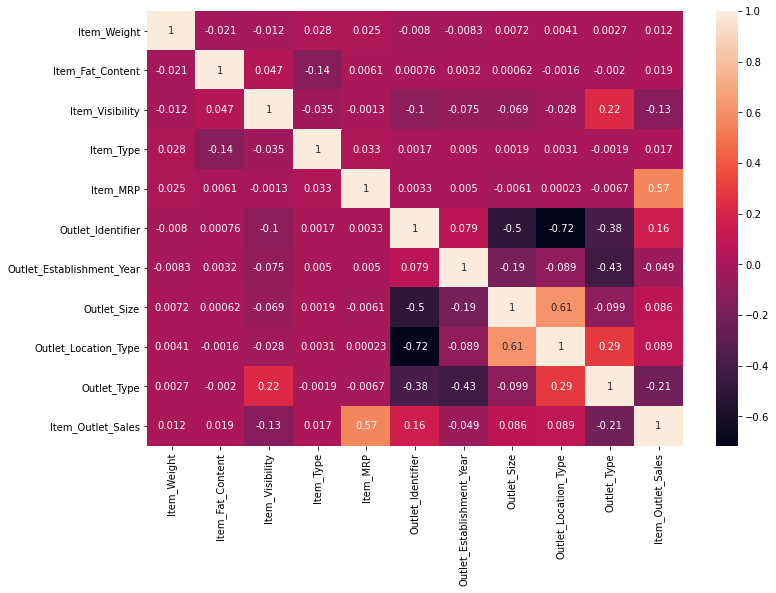

In [34]:
plt.figure(figsize=(12,8))
corr=train_data.corr()
sns.heatmap(corr,annot=True)

plt.show()

No Multicollinearity found.

Target value sales having maximum positive relation with 'Item_MRP' 57%.

Having very less/no correlation with some of the features.

Will check & remove these features later on.

### Scatterplot

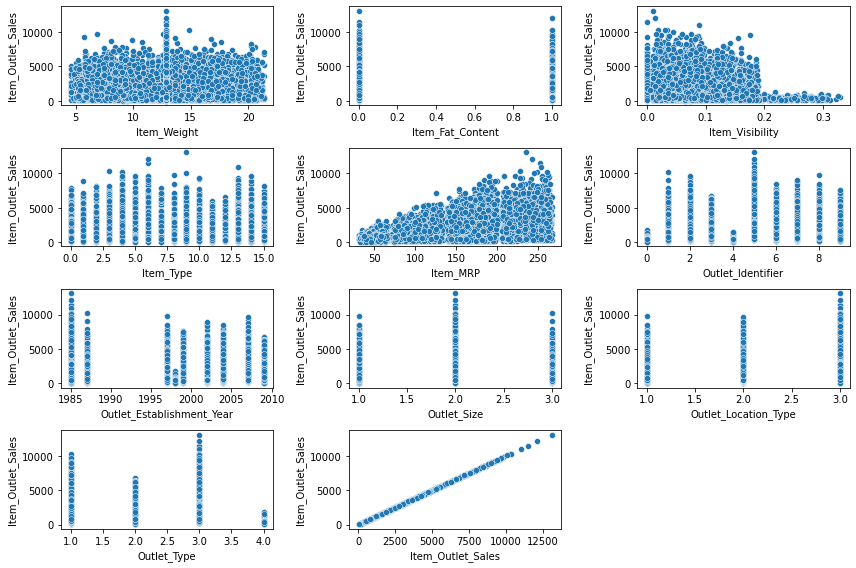

In [35]:
plt.figure(figsize=(12,8))

plotnumber=1

for col in train_data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.scatterplot(x=col,y='Item_Outlet_Sales',data=train_data)
        
    plotnumber+=1

plt.tight_layout()

same trends showing with scatterplot

### Data skewness & distribution

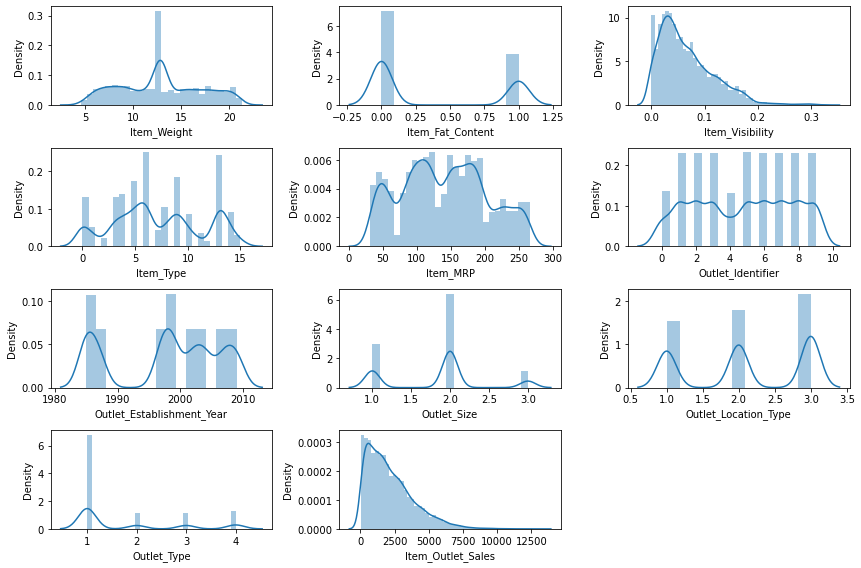

In [36]:
plt.figure(figsize=(12,8))

plotnumber=1

for col in train_data:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(train_data[col])
        
    plotnumber+=1

plt.tight_layout() 

In [37]:
train_data.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  1.183239
Item_Outlet_Sales            1.177531
dtype: float64

data having outliers & skewness will try to remove using z_score

### Removing skewness/outliers

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(train_data))
z.shape

(8523, 11)

In [40]:
data_new=train_data[(z<=3).all(axis=1)]
print(train_data.shape)
print(data_new.shape)

(8523, 11)
(8338, 11)


In [41]:
#loss data percentage after removing outliers:
print((8523-8338)/8523*100)

2.170597207556025


In [42]:
data_new.skew()

Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                  0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  1.255272
Item_Outlet_Sales            0.878267
dtype: float64

In [43]:
data_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,2.0,1,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,2.0,3,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,2.0,1,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,2.0,3,4,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,3.0,3,1,994.7052


In [44]:
#split feature & target

X=data_new.drop(columns=['Item_Outlet_Sales'])
y=data_new.Item_Outlet_Sales

### Scaling

In [45]:
scale=StandardScaler()
x_scale=scale.fit_transform(X)

### Model Building

Train test split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20,random_state=313)

In [47]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

#evaluation
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred)*100)

867.1388656910667
1289416.6610005896
1135.5248394467599
47.9247576048726


Since Logistic regression acheived 48% . will try some other algorithm to improve score.

In [48]:
rfr=RandomForestRegressor()
sv=SVR()
abr=AdaBoostRegressor()

In [49]:
#RandomForestRegressor
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print(r2_score(y_test,y_pred)*100)

51.60600988675219


In [50]:
#SVR
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)

print(r2_score(y_test,y_pred)*100)

6.471257829413879


In [51]:
#AdaBoostRegressor

abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)

print(r2_score(y_test,y_pred)*100)

53.89118902271398


AdaBoostRegressor achiving best score amongs 4 algorithm will with check cross validation.

## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
print('cv_score for LogisticRegression: ', np.mean(cross_val_score(lr,x_train,y_train)*100))
print('\ncv_score for RandomForestRegressor: ', np.mean(cross_val_score(rfr,x_train,y_train)*100))
print('\ncv_score for SVR: ', np.mean(cross_val_score(sv,x_train,y_train)*100))
print('\ncv_score for AdaBoostRegressor: ', np.mean(cross_val_score(abr,x_train,y_train)*100))

cv_score for LogisticRegression:  47.88548945270054

cv_score for RandomForestRegressor:  55.13041441361685

cv_score for SVR:  3.5713183772255035

cv_score for AdaBoostRegressor:  55.982822163784746


AdaBoostRegressor achived best score in Cross Validation as well. so will go try parameter tunning to improve score

### Hyper Parameter Tunning

In [54]:

params={'n_estimators':[1,3,5,10,20,50],
        'learning_rate':[.01,.05,.001],
        'random_state':[1,3,5,7,9,10]
        
    }

grd=GridSearchCV(estimator=abr,param_grid=params)
grd.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.001],
                         'n_estimators': [1, 3, 5, 10, 20, 50],
                         'random_state': [1, 3, 5, 7, 9, 10]})

In [80]:
abr=AdaBoostRegressor(learning_rate= 0.05, n_estimators= 200, random_state= 4)
print(grd.best_params_)
abr.fit(x_train,y_train)
y_pred=abr.predict(x_test)

print(r2_score(y_test,y_pred)*100)

{'learning_rate': 0.05, 'n_estimators': 50, 'random_state': 5}
54.23020725529219


After params tunning we are able to improve score a bit

### Final Score of AdaBoostRegressor

In [81]:
print('R Squared score: ',r2_score(y_test,y_pred)*100)
print('\nMean squared error: ',mean_squared_error(y_test,y_pred))
print('\nMean absolute error: ',mean_absolute_error(y_test,y_pred))
print('\nRoot mean square error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

R Squared score:  54.23020725529219

Mean squared error:  1133289.6520725982

Mean absolute error:  778.6946961776232

Root mean square error:  1064.5607789471667


### Model Save

In [57]:
filename='Big_mart_sales.pickle'

pickle.dump(rfr,open(filename,'wb'))

### Prediction on Test Data

In [58]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


### Test Data Cleaning before prediction

In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [86]:
from sklearn.impute import KNNImputer

imp= KNNImputer()

test_data['Item_Weight']=imp.fit_transform(test_data[['Item_Weight']])

In [87]:
test_data['Outlet_Size']=test_data['Outlet_Size'].map({'Small':1,'Medium':2,'High':3})

In [88]:
test_data['Outlet_Size']=si.fit_transform(test_data[['Outlet_Size']])

In [89]:
test_data.drop(columns=['Item_Identifier'],inplace=True)

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   float64
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 444.0+ KB


In [91]:
test_data['Item_Fat_Content'].replace({'Low Fat':'low fat','LF':'low fat','reg':'Regular'},inplace=True)

In [92]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].map({'low fat':0,'Regular':1})

In [93]:
test_data['Outlet_Location_Type']=test_data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 3':3, 'Tier 2':2})

In [94]:
test_data['Outlet_Type']=test_data['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 'Grocery Store':4,
       'Supermarket Type3':3})

In [95]:
#appling nominal encoder on 2 features.

enc=LabelEncoder()

test_data['Outlet_Identifier']=enc.fit_transform(test_data['Outlet_Identifier'])
test_data['Item_Type']=enc.fit_transform(test_data['Item_Type'])

In [96]:
test_data.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [97]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   int64  
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   int32  
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   int32  
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   float64
 8   Outlet_Location_Type       5681 non-null   int64  
 9   Outlet_Type                5681 non-null   int64  
dtypes: float64(4), int32(2), int64(4)
memory usage: 399.6 KB


Prediction on test data

In [98]:
Test_data_sales=rfr.predict(test_data)

In [99]:
Test_data_sales

array([3997.369988, 4177.841736,  629.420688, ..., 3966.649976,
       4193.927464, 4206.597638])

## model successfully run on test data & predicted sales.